In [ ]:
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import gzip
import nltk

In [3]:
import math
import sklearn

In [4]:
nltk.download('stopwords')
from nltk import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
tokenizer = RegexpTokenizer(r"\w+")
stop = stopwords.words('english')

In [6]:
with gzip.open('Software.json.gz') as rf:
  data = pd.read_json(rf, lines=True, dtype=str)

In [7]:
data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,nan,nan
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,nan,nan
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,nan
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,nan
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,nan,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,nan,nan


In [93]:
data_stripped = data[['overall', 'reviewText']]
data_stripped.head()

,overall,reviewText
0,4.0,The materials arrived early and were in excell...
1,4.0,I am really enjoying this book with the worksh...
2,1.0,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ..."
3,3.0,This book was missing pages!!! Important pages...
4,5.0,I have used LearnSmart and can officially say ...


In [96]:
data_stripped['reviewText'].fillna('was nan')
data_stripped.isna().any()

overall       False
reviewText    False
dtype: bool

In [95]:
reviews = data_stripped['reviewText'].to_numpy()
print(reviews[:2])

["The materials arrived early and were in excellent condition.  However for the money spent they really should've come with a binder and not just loose leaf."
 'I am really enjoying this book with the worksheets that make you review your goals, what to do when you do not make it, it reminds me  of my human sexuality classwork.']


In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(max_df=0.70, stop_words='english')
vectorized = vectorizer.fit_transform(reviews)
tfidf = TfidfTransformer()
tfidf_mat = tfidf.fit_transform(vectorized)

In [92]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=100)
features = lsa.fit_transform(tfidf_mat)

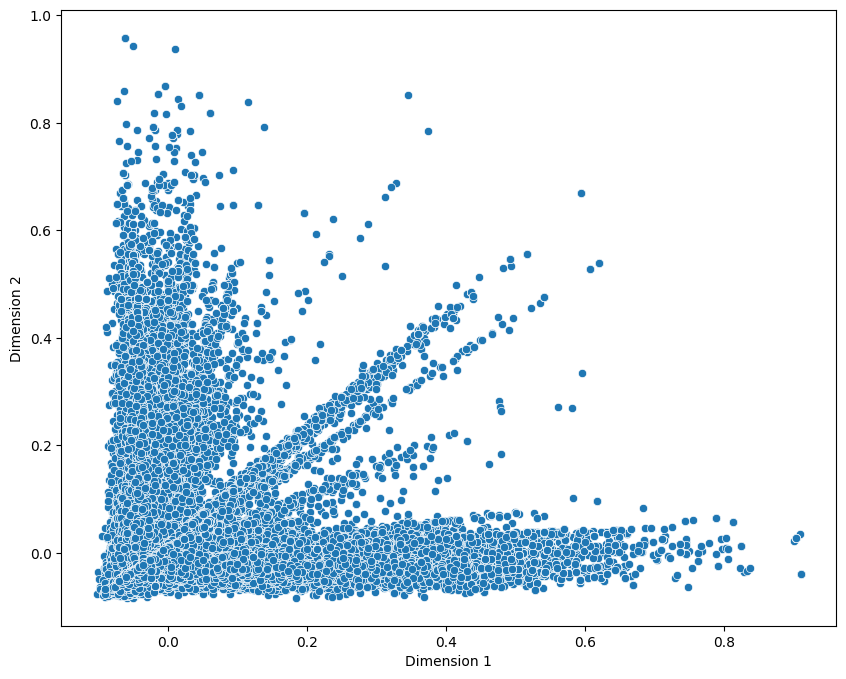

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(features)

# Create a DataFrame for visualization
plot_df = pd.DataFrame(data={'Dimension 1': pca[:, 0], 'Dimension 2': pca[:, 1]})

# Visualize the data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=plot_df)
plt.show()

In [114]:
from sklearn.cluster import KMeans

# Clustering using K-Means
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

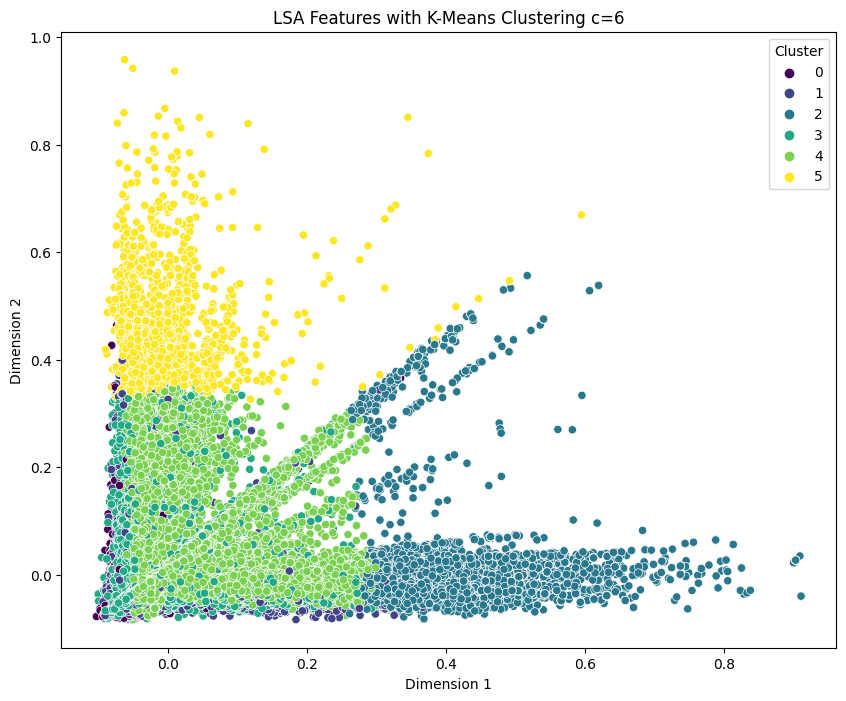

In [116]:
# Create a DataFrame for visualization
plot_df = pd.DataFrame(data={'Dimension 1': pca[:, 0], 'Dimension 2': pca[:, 1], 'Cluster': cluster_labels})

# Visualize the data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=plot_df, palette='viridis')
plt.title(f'LSA Features with K-Means Clustering c={num_clusters}')
plt.show()

In [117]:
cluster0 = [reviews[i] for i in range(len(cluster_labels)) if cluster_labels[i] == 0]
cluster1 = [reviews[i] for i in range(len(cluster_labels)) if cluster_labels[i] == 1]
cluster2 = [reviews[i] for i in range(len(cluster_labels)) if cluster_labels[i] == 2]

In [118]:
cluster_ratings = [0] * num_clusters
cluster_counts = [0] * num_clusters
ratings = data_stripped['overall'].to_numpy()

for i, x in enumerate(cluster_labels):
  cluster_ratings[x] += float(ratings[i])
  cluster_counts[x] += 1

for i in range(num_clusters):
  cluster_ratings[i] /= cluster_counts[i]

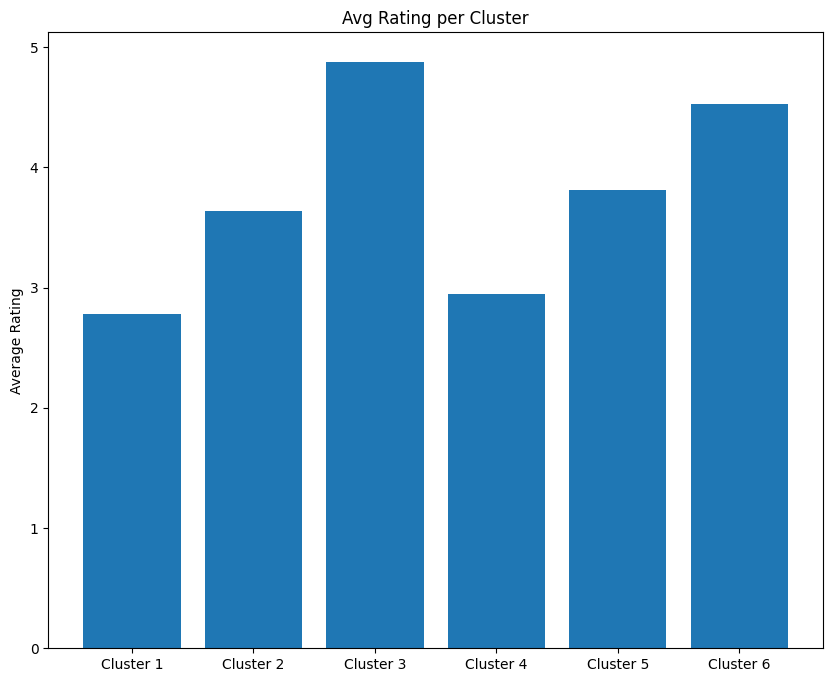

In [120]:
plt.figure(figsize=(10, 8))
plt.bar(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'], cluster_ratings)
plt.title('Avg Rating per Cluster')
plt.ylabel('Average Rating')
plt.show()

In [121]:
my_review = "This product was absolutely horrible. I never want to buy it again!"

cluster = kmeans.predict(lsa.transform(tfidf.transform(vectorizer.transform([my_review]))))

In [122]:
cluster

array([4], dtype=int32)